In [2]:
import tensorflow as tf 
import os 
import numpy as np 
from google.colab import drive 

SEED= 10714338
tf.random.set_seed(SEED)

cwd= os.getcwd() #get current working directory 

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls /content/

drive  sample_data


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

apply_data_augmentation  = True

if  apply_data_augmentation:
  train_datagen = ImageDataGenerator(             #this data augmentation is gonna modify the images at each epoch 
  width_shift_range = 0.2, 
  height_shift_range = 0.2,
  vertical_flip=True,shear_range = 0.2,
  fill_mode='nearest',
  cval=0,
  rescale=1./255)
  
else:
  train_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen= ImageDataGenerator(rescale= 1./255)

#datagen = ImageDataGenerator(
 #       rotation_range=40,
  #      width_shift_range=0.2,
   #     height_shift_range=0.2,
    #    rescale=1./255,
     #   shear_range=0.2,
      #  ,
       # horizontal_flip=True,
        #fill_mode='nearest')

In [6]:

#now I need to get the test images and associate them to the label contained in the json file 
import pandas as pd
import json
import sklearn


json_path=os.path.join(cwd,'drive','My Drive','AN2DL_HW_1','MaskDataset')

with open(os.path.join(json_path,"train_gt.json")) as j:
  tmp = json.load(j)

train_df = pd.DataFrame(tmp.items())
train_df.rename(columns = {0:'filename', 1:'class'}, inplace = True)
train_df["class"] = train_df["class"].astype(str)

train_df_shuffled=sklearn.utils.shuffle(train_df) #here we could divide the dataset in training and validation
ctr0 = 0
ctr1 = 0
ctr2 = 0
print(train_df_shuffled)

training_df= train_df_shuffled[:4491]
validation_df= train_df_shuffled[4491:]
for i in validation_df["class"]:
  #print(i)
  if i == '0':
    ctr0 = ctr0 + 1
  elif i == '1':
    ctr1 = ctr1 + 1
  else:
    ctr2 = ctr2 + 1
print(ctr0)
print(ctr1)
print(ctr2)
#print(validation_df,training_df)

       filename class
146   11501.jpg     0
118   12920.jpg     0
13    11657.jpg     0
2250  17188.jpg     1
210   13889.jpg     0
...         ...   ...
2355  15521.jpg     1
1899  17861.jpg     0
4526  11340.jpg     2
1836  16632.jpg     0
5427  14716.jpg     2

[5614 rows x 2 columns]
558
582
544


In [7]:
#Let's create the generators 

directory_training =os.path.join(cwd,'drive','My Drive','AN2DL_HW_1','MaskDataset','training')


bs = 8

train_generator=train_datagen.flow_from_dataframe(
dataframe=training_df,
directory=directory_training,
x_col="filename",
y_col="class",
batch_size=bs,
seed=SEED,

shuffle=True,
target_size=(256, 256),
class_mode="categorical",
)

valid_generator=valid_datagen.flow_from_dataframe(
dataframe=validation_df,
directory=directory_training,
x_col="filename",
y_col="class",
batch_size=bs,
seed=SEED,
shuffle=True,
target_size=(256, 256),
class_mode="categorical",
)

Found 3930 validated image filenames belonging to 3 classes.
Found 1684 validated image filenames belonging to 3 classes.


In [8]:
num_classes=3
img_h=256
img_w=256


train_dataset= tf.data.Dataset.from_generator(lambda:train_generator,
                                              (tf.float32, tf.float32),
                                              ([None,img_h,img_w,3],[None,num_classes])) 

train_dataset=train_dataset.repeat()

validation_dataset= tf.data.Dataset.from_generator(lambda:valid_generator,
                                              (tf.float32, tf.float32),
                                              ([None,img_h,img_w,3],[None,num_classes]))


validation_dataset=validation_dataset.repeat()


[]

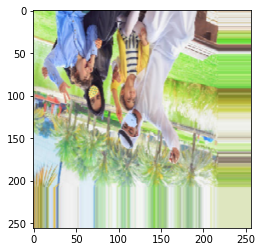

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

iterator= iter(train_dataset)

img , target = next(iterator)

img= np.array(img[0])
img=img *255
plt.imshow(np.uint8(img))
plt.plot()

[]

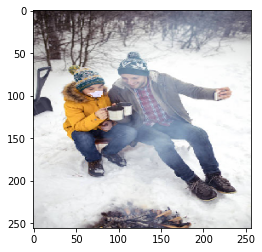

In [10]:
%matplotlib inline

iterator= iter(validation_dataset)

img , target = next(iterator)

img= np.array(img[0])
img=img *255
plt.imshow(np.uint8(img))
plt.plot()

In [11]:
from tensorflow.keras import datasets, layers, models
from keras.layers import Dropout
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(filters = 8, padding = 'same', kernel_size = (3, 3), strides = (1,1),input_shape=(256, 256, 3)))
model.add(tf.keras.layers.ReLU())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), strides = (1,1), padding = 'same'))
model.add(tf.keras.layers.ReLU())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3),strides = (1,1),padding = 'same'))
model.add(tf.keras.layers.ReLU())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1,1), padding = 'same' ))
model.add(tf.keras.layers.ReLU())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = (1,1), padding = 'same'))
model.add(tf.keras.layers.ReLU())
model.add(layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
#model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
#model.add(Dropout(0.5))
#model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 8)       224       
_________________________________________________________________
re_lu (ReLU)                 (None, 256, 256, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     9344      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 128, 128, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        7

In [12]:
lr = 1e-4;
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=lr), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])
nb_epochs = 15
batch_size = bs

In [20]:
model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = valid_generator, 
    validation_steps = valid_generator.samples // batch_size,
    epochs = nb_epochs)

Epoch 1/15
491/491 [==============================] - 94s 191ms/step - loss: 0.4454 - accuracy: 0.7998 - val_loss: 0.5202 - val_accuracy: 0.7619
Epoch 2/15
491/491 [==============================] - 93s 190ms/step - loss: 0.4335 - accuracy: 0.8034 - val_loss: 0.5109 - val_accuracy: 0.7756
Epoch 3/15
491/491 [==============================] - 96s 196ms/step - loss: 0.4295 - accuracy: 0.8037 - val_loss: 0.5674 - val_accuracy: 0.7393
Epoch 4/15
491/491 [==============================] - 95s 193ms/step - loss: 0.4199 - accuracy: 0.8177 - val_loss: 0.5416 - val_accuracy: 0.7482
Epoch 5/15
491/491 [==============================] - 93s 189ms/step - loss: 0.4236 - accuracy: 0.8047 - val_loss: 0.5305 - val_accuracy: 0.7690
Epoch 6/15
491/491 [==============================] - 94s 191ms/step - loss: 0.4163 - accuracy: 0.8088 - val_loss: 0.5755 - val_accuracy: 0.7506
Epoch 7/15
491/491 [==============================] - 93s 189ms/step - loss: 0.4212 - accuracy: 0.8093 - val_loss: 0.5771 - val_ac

In [21]:
 test_dir =os.path.join(cwd,'drive','My Drive','AN2DL_HW_1','MaskDataset','test')

test_gen = test_datagen.flow_from_directory(test_dir, target_size=(img_h, img_w), 
                                                 color_mode='rgb',
                                                 class_mode='categorical',
                                                 classes = None,
                                                 batch_size=1,
                                                 shuffle=False)
test_gen.reset()

predictions = model.predict_generator(test_gen, len(test_gen), verbose=1)


from datetime import datetime

def create_csv(results, results_dir='./'):

    csv_fname = 'results_'
    csv_fname += datetime.now().strftime('%b%d_%H-%M-%S') + '.csv'

    with open(os.path.join(results_dir, csv_fname), 'w') as f:

        f.write('Id,Category\n')

        for key, value in results.items():
            f.write(key + ',' + str(value) + '\n')

results = {}
images = test_gen.filenames
i = 0

for p in predictions:
  prediction = np.argmax(p)
  import ntpath
  image_name = ntpath.basename(images[i])
  results[image_name] = str(prediction)
  i = i + 1
  
create_csv(results, '/content/drive/My Drive/AN2DL_HW_1')

Found 450 images belonging to 1 classes.
450/450 [==============================] - 3s 8ms/step
